## Import Library yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Membuat variabel untuk memanggil dataset

In [86]:
train_dir = "Datasets/Used/training"
val_dir = "Datasets/Used/validation"
test_dir = "Datasets/Used/testing"

Load gambar dengan menggunakan library keras

In [3]:
## Membuat parameter untuk load dataset

batch_size = 32
img_size = (160, 160)

In [89]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size= img_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size= img_size,
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size= img_size,
  batch_size=batch_size)

Found 3442 files belonging to 2 classes.
Found 860 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


Melihat isi class pada dataset

In [9]:
train_class = train_ds.class_names
val_class = val_ds.class_names

print(f'Nama Class pada dataset train', train_class)
print(f'Nama Class pada dataset validation', val_class)

Nama Class pada dataset train ['glasses', 'no_glasses']
Nama Class pada dataset validation ['glasses', 'no_glasses']


### Augmentasi

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(160, 160, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualisasi data augmentasi

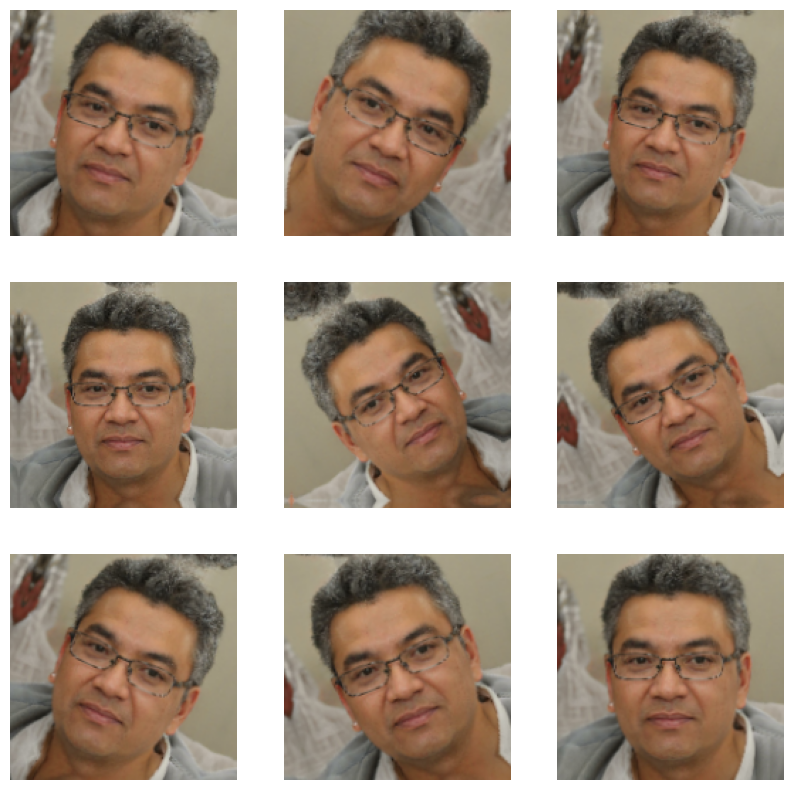

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Konfigurasi dataset 
menggunakan prefetch() untuk menghasilkan dataset dari disk tanpa membloki I/O, lalu dengan menggunakan cache() untuk menyimpan data gambar pada memori dari epoch pertama. Sehingga tidak ada hambatan pada saat training model. 

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standarisasi data
karena nilai RGB tidak ideal dalam Neural Network, maka diperlukan standarisasi data dengan skala 0,1


In [15]:
normalization_layer = layers.Rescaling(1./255) ## digunakan pada saat membuat model, ini hanya contoh dan pengingat saja

## Membuat model

In [35]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), ## menggunakan dropout dengan nilai 20% untuk mengurangi overfitting
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 80, 80, 16)        0         
                                                                 
 flatten_7 (Flatten)         (None, 102400)            0         
                                                      

## Compile Model

In [37]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [38]:
class iniCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >= 95):
            print("Stop training karena accuracy sudah mencapai 95%")
            self.model.stop_training = TRUE 

In [39]:
myCallback = iniCallback()

In [40]:
initial_epochs = 10

model_fit = model.fit(train_ds,
                    epochs= initial_epochs,
                    validation_data= val_ds,
                    callbacks =[myCallback])

Epoch 1/10


c:\Users\WINDOWS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


108/108 [==============================] - 35s 293ms/step - loss: 0.6369 - accuracy: 0.6293 - val_loss: 0.5300 - val_accuracy: 0.8000
Epoch 2/10
108/108 [==============================] - 32s 295ms/step - loss: 0.5419 - accuracy: 0.7545 - val_loss: 0.4192 - val_accuracy: 0.8640
Epoch 3/10
108/108 [==============================] - 35s 321ms/step - loss: 0.4569 - accuracy: 0.8277 - val_loss: 0.3483 - val_accuracy: 0.8837
Epoch 4/10
108/108 [==============================] - 31s 287ms/step - loss: 0.3964 - accuracy: 0.8605 - val_loss: 0.2814 - val_accuracy: 0.9256
Epoch 5/10
108/108 [==============================] - 33s 306ms/step - loss: 0.3498 - accuracy: 0.8873 - val_loss: 0.2417 - val_accuracy: 0.9233
Epoch 6/10
108/108 [==============================] - 32s 300ms/step - loss: 0.3091 - accuracy: 0.8989 - val_loss: 0.1980 - val_accuracy: 0.9547
Epoch 7/10
108/108 [==============================] - 31s 284ms/step - loss: 0.2775 - accuracy: 0.9178 - val_loss: 0.1797 - val_accuracy: 0.9

## Visualisasi hasil akurasi dan loss dari training model

In [41]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss_ = model_fit.history['loss']
val_loss_ = model_fit.history['val_loss']

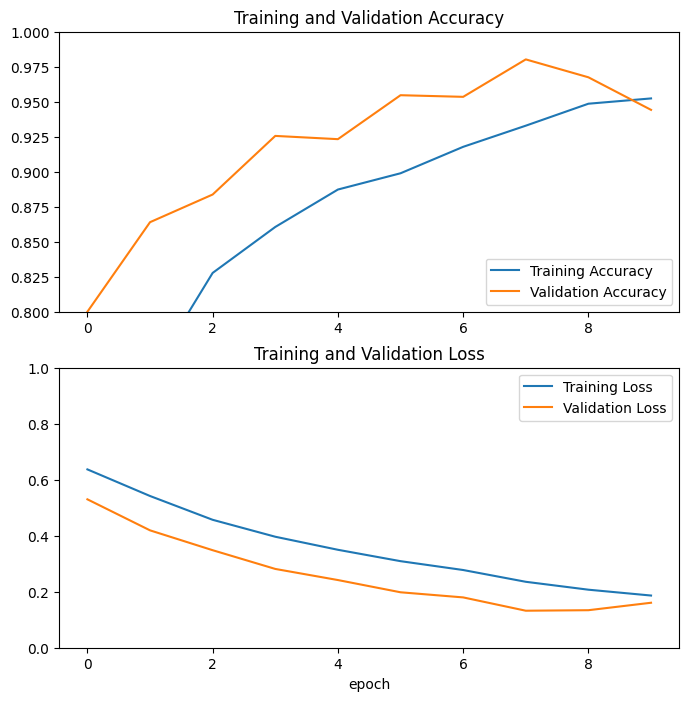

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_, label='Training Loss')
plt.plot(val_loss_, label='Validation Loss')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Membuat test dataset untuk evaluasi model

In [54]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Evaluasi model menggunakan data test

In [45]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

5/5 [==============================] - 0s 63ms/step - loss: 0.1518 - accuracy: 0.9563
Test accuracy : 0.956250011920929


In [51]:
train_data = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

class_names = train_data.class_names

Found 3442 files belonging to 2 classes.


## Predicted
memasukkan data baru untuk prediksi

In [119]:
glasses_dir = "Datasets/Used/testing/glasses/face-14.jpg"

img = tf.keras.utils.load_img(
    glasses_dir, target_size=(160,160)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Gambar ini masuk kedalam class {} dengan presentase {:.2f}."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
Gambar ini masuk kedalam class glasses dengan presentase 100.00.


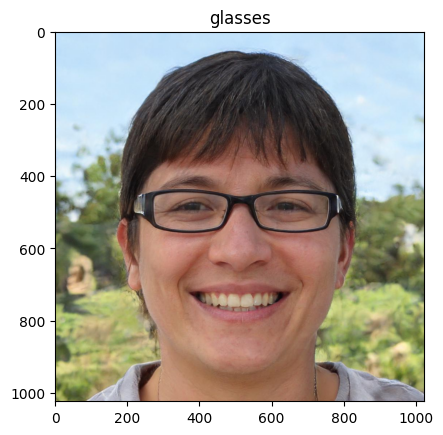

In [120]:
import matplotlib.image as mpimg

%matplotlib inline

for i in range(1):
    p = glasses_dir.format(i)
    #print p
    image = mpimg.imread(p) # images are color images
    plt.gca().clear()
    plt.imshow(image)
    plt.title(class_names[np.argmax(score)])

## Menyimpan Model

In [123]:
model.save('model/model_finished')
model.save('model/model_finished.h5')

INFO:tensorflow:Assets written to: model_finished\assets


INFO:tensorflow:Assets written to: model_finished\assets
